**Investigating the Adoption of Research Software**

***Survey***

In [2]:
from google.colab import files
import io
uploaded = files.upload()


Saving Survey_Perfil_Todos_Usuario_e_Desenvolvedor.xlsx to Survey_Perfil_Todos_Usuario_e_Desenvolvedor.xlsx


In [3]:
file_name = next(iter(uploaded))
file_name

'Survey_Perfil_Todos_Usuario_e_Desenvolvedor.xlsx'

In [5]:
%matplotlib inline

import os, sys
sys.path.insert(1, os.path.join(sys.path[0], '..'))
from functools import reduce
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import statistics as s



In [6]:
df = pd.read_excel(file_name)

df

,PERFIL,TEMPO_USO,FREQUENCIA_USO,IDADE,GENERO,FORMACAO,ANOS_EXPERIENCIA,UTILIZACAO_D01F01,UTILIZACAO_D01F02,UTILIZACAO_D01F03,...,QUALIDADE_D02F07,QUALIDADE_D02F08,NAO_ADOCAO_D03F01,NAO_ADOCAO_D03F02,NAO_ADOCAO_D03F03,NAO_ADOCAO_D03F04,NAO_ADOCAO_D03F05,NAO_ADOCAO_D03F06,NAO_ADOCAO_D03F07,NAO_ADOCAO_D03F08
0,1,3,3,2,1,4,3,5,5,5,...,5,5,5,5,5,5,5,5,5,5
1,1,4,4,1,2,4,2,4,2,3,...,2,2,4,5,2,4,2,3,4,3
2,1,3,4,2,2,2,2,2,5,4,...,5,5,4,5,2,3,4,4,5,4
3,1,2,3,3,1,4,2,4,3,4,...,4,4,5,4,5,5,3,3,5,3
4,1,1,5,3,1,4,2,5,3,5,...,4,5,5,5,3,4,2,5,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,2,4,4,2,2,4,3,4,3,4,...,4,4,5,5,4,4,3,0,4,4
169,2,2,3,2,2,4,2,4,3,5,...,2,4,5,5,4,4,2,3,2,4
170,2,1,3,1,2,2,2,3,2,4,...,4,5,4,5,3,4,3,2,4,4
171,2,4,3,2,2,5,3,4,4,5,...,4,5,5,5,5,5,1,2,5,5


In [7]:
# Selecting columns
df1 = df.loc[:, lambda df:['UTILIZACAO_D01F01', 'UTILIZACAO_D01F02', 'UTILIZACAO_D01F03', 'UTILIZACAO_D01F04', 'UTILIZACAO_D01F05', 'UTILIZACAO_D01F06', 'UTILIZACAO_D01F07', 'UTILIZACAO_D01F08' ]]
df1.columns = ['D01F01', 'D01F02','D01F03', 'D01F04', 'D01F05', 'D01F06', 'D01F07', 'D01F08']
df1

,D01F01,D01F02,D01F03,D01F04,D01F05,D01F06,D01F07,D01F08
0,5,5,5,5,5,5,5,5
1,4,2,3,5,1,1,1,3
2,2,5,4,4,4,3,1,4
3,4,3,4,4,3,3,4,4
4,5,3,5,5,2,2,4,4
...,...,...,...,...,...,...,...,...
168,4,3,4,5,3,4,2,4
169,4,3,5,5,3,4,1,5
170,3,2,4,5,5,4,3,4
171,4,4,5,5,1,1,5,5


In [8]:
df1.style.format("{:.2}").set_properties(**{'text-align': 'center'}).set_table_styles([
    dict(selector="th", props=[("text-align", "center")]),]).hide_index()


<ipython-input-8-1f36c6b33afc>:2: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  dict(selector="th", props=[("text-align", "center")]),]).hide_index()


ValueError: ignored

In [9]:
print("\n\033[1mReport Investigating Research Software (Survey) \033[0m")
print("\nTotal of respondents = ", len(df1))




Report Investigating Research Software (Survey) 

Total of respondents =  173


D01F01 - Be widely used within the academy

D01F02 - Be widely used outside academia

D01F03 - Have comprehensive documentation in different media for the user

D01F04 - Have clear and consistent documentation for using the software

D01F05 - Be widely cited in scientific articles

D01F06 - Have articles published about the software

D01F07 - Be publicized in social networks, events and media

D01F08 - Be recognized as a reference for the research area

In [10]:
df1.describe().style.format("{:.4}")

,D01F01,D01F02,D01F03,D01F04,D01F05,D01F06,D01F07,D01F08
count,173.0,173.0,173.0,173.0,173.0,173.0,173.0,173.0
mean,3.884,2.838,3.746,4.168,3.012,2.827,2.555,3.832
std,1.056,1.242,1.163,1.023,1.325,1.391,1.357,1.201
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,3.0,2.0,3.0,4.0,2.0,2.0,1.0,3.0
50%,4.0,3.0,4.0,4.0,3.0,3.0,2.0,4.0
75%,5.0,4.0,5.0,5.0,4.0,4.0,4.0,5.0
max,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0


In [11]:
df2 = df1.loc[df1['D01F01'] == 5.0]

df2['Percentual'] = (((len(df2['D01F01']))/173) *100)

df2

<ipython-input-11-500a14ea919d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Percentual'] = (((len(df2['D01F01']))/173) *100)


,D01F01,D01F02,D01F03,D01F04,D01F05,D01F06,D01F07,D01F08,Percentual
0,5,5,5,5,5,5,5,5,31.791908
4,5,3,5,5,2,2,4,4,31.791908
6,5,3,4,4,3,3,2,4,31.791908
8,5,3,4,4,2,2,4,5,31.791908
9,5,3,5,5,3,3,2,5,31.791908
11,5,4,5,5,5,4,4,5,31.791908
13,5,2,4,5,4,4,4,5,31.791908
16,5,5,5,5,5,5,5,5,31.791908
17,5,4,4,4,4,4,5,5,31.791908
18,5,2,3,4,2,1,1,3,31.791908


In [12]:
df3_grafico = pd.DataFrame({'D01F01 (%)':[(len(df1.loc[df1['D01F01'] == 5.0])/173) *100, (len(df1.loc[df1['D01F01'] == 4.0])/173) *100, (len(df1.loc[df1['D01F01'] == 3.0])/173) *100, (len(df1.loc[df1['D01F01'] == 2.0])/173) *100, (len(df1.loc[df1['D01F01'] == 1.0])/173) *100, (len(df1.loc[df1['D01F01'] == 0.0])/173) *100],
                   'D01F02 (%)':[(len(df1.loc[df1['D01F02'] == 5.0])/173) *100, (len(df1.loc[df1['D01F02'] == 4.0])/173) *100, (len(df1.loc[df1['D01F02'] == 3.0])/173) *100, (len(df1.loc[df1['D01F02'] == 2.0])/173) *100, (len(df1.loc[df1['D01F02'] == 1.0])/173) *100, (len(df1.loc[df1['D01F02'] == 0.0])/173) *100],
                   'D01F03 (%)':[(len(df1.loc[df1['D01F03'] == 5.0])/173) *100, (len(df1.loc[df1['D01F03'] == 4.0])/173) *100, (len(df1.loc[df1['D01F03'] == 3.0])/173) *100, (len(df1.loc[df1['D01F03'] == 2.0])/173) *100, (len(df1.loc[df1['D01F03'] == 1.0])/173) *100, (len(df1.loc[df1['D01F03'] == 0.0])/173) *100],
                   'D01F04 (%)':[(len(df1.loc[df1['D01F04'] == 5.0])/173) *100, (len(df1.loc[df1['D01F04'] == 4.0])/173) *100, (len(df1.loc[df1['D01F04'] == 3.0])/173) *100, (len(df1.loc[df1['D01F04'] == 2.0])/173) *100, (len(df1.loc[df1['D01F04'] == 1.0])/173) *100, (len(df1.loc[df1['D01F04'] == 0.0])/173) *100],
                   'D01F05 (%)':[(len(df1.loc[df1['D01F05'] == 5.0])/173) *100, (len(df1.loc[df1['D01F05'] == 4.0])/173) *100, (len(df1.loc[df1['D01F05'] == 3.0])/173) *100, (len(df1.loc[df1['D01F05'] == 2.0])/173) *100, (len(df1.loc[df1['D01F05'] == 1.0])/173) *100, (len(df1.loc[df1['D01F05'] == 0.0])/173) *100],
                    'D01F06 (%)':[(len(df1.loc[df1['D01F06'] == 5.0])/173) *100, (len(df1.loc[df1['D01F06'] == 4.0])/173) *100, (len(df1.loc[df1['D01F06'] == 3.0])/173) *100, (len(df1.loc[df1['D01F06'] == 2.0])/173) *100, (len(df1.loc[df1['D01F06'] == 1.0])/173) *100, (len(df1.loc[df1['D01F06'] == 0.0])/173) *100],
                    'D01F07 (%)':[(len(df1.loc[df1['D01F07'] == 5.0])/173) *100, (len(df1.loc[df1['D01F07'] == 4.0])/173) *100, (len(df1.loc[df1['D01F07'] == 3.0])/173) *100, (len(df1.loc[df1['D01F07'] == 2.0])/173) *100, (len(df1.loc[df1['D01F07'] == 1.0])/173) *100, (len(df1.loc[df1['D01F07'] == 0.0])/173) *100],
                    'D01F08 (%)':[(len(df1.loc[df1['D01F08'] == 5.0])/173) *100, (len(df1.loc[df1['D01F08'] == 4.0])/173) *100, (len(df1.loc[df1['D01F08'] == 3.0])/173) *100, (len(df1.loc[df1['D01F08'] == 2.0])/173) *100, (len(df1.loc[df1['D01F08'] == 1.0])/173) *100, (len(df1.loc[df1['D01F08'] == 0.0])/173) *100]
                   })
# Create the index
index_ = ['Very important', 'Important', 'Median important', 'Little important', 'Nothing important', 'I don\'t know']
df3_grafico.index = index_

pd.options.display.float_format = '{:.2f}'.format

df3_grafico

center_aligned_df = df3_grafico.style.set_properties(**{'text-align': 'center'})

center_aligned_df = center_aligned_df.set_table_styles(
[dict(selector = 'th', props=[('text-align', 'center')])])

pd.options.display.float_format = '{:.2f}'.format

center_aligned_df


df3_grafico


,D01F01 (%),D01F02 (%),D01F03 (%),D01F04 (%),D01F05 (%),D01F06 (%),D01F07 (%),D01F08 (%)
Very important,31.79,9.83,29.48,47.40,15.03,12.14,10.40,34.10
Important,40.46,22.54,38.15,33.53,22.54,24.86,16.18,35.84
Median important,14.45,24.86,14.45,9.83,28.90,21.39,20.81,16.76
Little important,11.56,29.48,14.45,7.51,17.92,19.65,26.59,8.09
Nothing important,1.16,10.98,2.31,1.16,13.29,19.08,23.12,2.89
I don't know,0.58,2.31,1.16,0.58,2.31,2.89,2.89,2.31


In [13]:
df3_grafico

,D01F01 (%),D01F02 (%),D01F03 (%),D01F04 (%),D01F05 (%),D01F06 (%),D01F07 (%),D01F08 (%)
Very important,31.79,9.83,29.48,47.40,15.03,12.14,10.40,34.10
Important,40.46,22.54,38.15,33.53,22.54,24.86,16.18,35.84
Median important,14.45,24.86,14.45,9.83,28.90,21.39,20.81,16.76
Little important,11.56,29.48,14.45,7.51,17.92,19.65,26.59,8.09
Nothing important,1.16,10.98,2.31,1.16,13.29,19.08,23.12,2.89
I don't know,0.58,2.31,1.16,0.58,2.31,2.89,2.89,2.31


In [14]:
df4 = df3_grafico.loc[df3_grafico.index.isin(['Very important','Important'])]
df4


,D01F01 (%),D01F02 (%),D01F03 (%),D01F04 (%),D01F05 (%),D01F06 (%),D01F07 (%),D01F08 (%)
Very important,31.79,9.83,29.48,47.40,15.03,12.14,10.40,34.10
Important,40.46,22.54,38.15,33.53,22.54,24.86,16.18,35.84


In [15]:

df5 = df4.append(df4.sum(numeric_only=True),ignore_index=True)

df5

<ipython-input-15-ca688a5b6353>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df5 = df4.append(df4.sum(numeric_only=True),ignore_index=True)


,D01F01 (%),D01F02 (%),D01F03 (%),D01F04 (%),D01F05 (%),D01F06 (%),D01F07 (%),D01F08 (%)
0,31.79,9.83,29.48,47.40,15.03,12.14,10.40,34.10
1,40.46,22.54,38.15,33.53,22.54,24.86,16.18,35.84
2,72.25,32.37,67.63,80.92,37.57,36.99,26.59,69.94


In [16]:
df3_grafico = df3_grafico.append(df4.sum(numeric_only=True),ignore_index=True)

# Create the index
index_ = ['Very important', 'Important', 'Median important', 'Little important', 'Nothing important', 'I don\'t know', 'Total']
df3_grafico.index = index_

df3_grafico

<ipython-input-16-05e31a08c36a>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df3_grafico = df3_grafico.append(df4.sum(numeric_only=True),ignore_index=True)


,D01F01 (%),D01F02 (%),D01F03 (%),D01F04 (%),D01F05 (%),D01F06 (%),D01F07 (%),D01F08 (%)
Very important,31.79,9.83,29.48,47.40,15.03,12.14,10.40,34.10
Important,40.46,22.54,38.15,33.53,22.54,24.86,16.18,35.84
Median important,14.45,24.86,14.45,9.83,28.90,21.39,20.81,16.76
Little important,11.56,29.48,14.45,7.51,17.92,19.65,26.59,8.09
Nothing important,1.16,10.98,2.31,1.16,13.29,19.08,23.12,2.89
I don't know,0.58,2.31,1.16,0.58,2.31,2.89,2.89,2.31
Total,72.25,32.37,67.63,80.92,37.57,36.99,26.59,69.94


In [17]:
#df4 = df3_grafico.loc[df3_grafico.index.isin(['Very important','Important'])]
#df4

#df4['Level'] = df4.index
#df4 = df4.rename_axis('index').reset_index()

df4 = df3_grafico

df4.style.hide_index()


df5 = df4.transpose()

df5


<ipython-input-17-9ba06921a793>:9: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  df4.style.hide_index()


,Very important,Important,Median important,Little important,Nothing important,I don't know,Total
D01F01 (%),31.79,40.46,14.45,11.56,1.16,0.58,72.25
D01F02 (%),9.83,22.54,24.86,29.48,10.98,2.31,32.37
D01F03 (%),29.48,38.15,14.45,14.45,2.31,1.16,67.63
D01F04 (%),47.40,33.53,9.83,7.51,1.16,0.58,80.92
D01F05 (%),15.03,22.54,28.90,17.92,13.29,2.31,37.57
D01F06 (%),12.14,24.86,21.39,19.65,19.08,2.89,36.99
D01F07 (%),10.40,16.18,20.81,26.59,23.12,2.89,26.59
D01F08 (%),34.10,35.84,16.76,8.09,2.89,2.31,69.94


In [18]:
df6 = df5.sort_values(['Total','Very important'] , axis = 0, ascending=[False, False])

#df6 = df5.sort_values(by='Total', axis = 0, ascending=False)

df6

,Very important,Important,Median important,Little important,Nothing important,I don't know,Total
D01F04 (%),47.40,33.53,9.83,7.51,1.16,0.58,80.92
D01F01 (%),31.79,40.46,14.45,11.56,1.16,0.58,72.25
D01F08 (%),34.10,35.84,16.76,8.09,2.89,2.31,69.94
D01F03 (%),29.48,38.15,14.45,14.45,2.31,1.16,67.63
D01F05 (%),15.03,22.54,28.90,17.92,13.29,2.31,37.57
D01F06 (%),12.14,24.86,21.39,19.65,19.08,2.89,36.99
D01F02 (%),9.83,22.54,24.86,29.48,10.98,2.31,32.37
D01F07 (%),10.40,16.18,20.81,26.59,23.12,2.89,26.59


In [19]:
df7 = df6.transpose()

df7

,D01F04 (%),D01F01 (%),D01F08 (%),D01F03 (%),D01F05 (%),D01F06 (%),D01F02 (%),D01F07 (%)
Very important,47.40,31.79,34.10,29.48,15.03,12.14,9.83,10.40
Important,33.53,40.46,35.84,38.15,22.54,24.86,22.54,16.18
Median important,9.83,14.45,16.76,14.45,28.90,21.39,24.86,20.81
Little important,7.51,11.56,8.09,14.45,17.92,19.65,29.48,26.59
Nothing important,1.16,1.16,2.89,2.31,13.29,19.08,10.98,23.12
I don't know,0.58,0.58,2.31,1.16,2.31,2.89,2.31,2.89
Total,80.92,72.25,69.94,67.63,37.57,36.99,32.37,26.59


In [20]:
df7 = df7.drop(df7.index[6])

df7

,D01F04 (%),D01F01 (%),D01F08 (%),D01F03 (%),D01F05 (%),D01F06 (%),D01F02 (%),D01F07 (%)
Very important,47.40,31.79,34.10,29.48,15.03,12.14,9.83,10.40
Important,33.53,40.46,35.84,38.15,22.54,24.86,22.54,16.18
Median important,9.83,14.45,16.76,14.45,28.90,21.39,24.86,20.81
Little important,7.51,11.56,8.09,14.45,17.92,19.65,29.48,26.59
Nothing important,1.16,1.16,2.89,2.31,13.29,19.08,10.98,23.12
I don't know,0.58,0.58,2.31,1.16,2.31,2.89,2.31,2.89


D01F01 - Be widely used within the academy

D01F02 - Be widely used outside academia

D01F03 - Have comprehensive documentation in different media for the user

D01F04 - Have clear and consistent documentation for using the software

D01F05 - Be widely cited in scientific articles

D01F06 - Have articles published about the software

D01F07 - Be publicized in social networks, events and media

D01F08 - Be recognized as a reference for the research area

In [26]:

df7.columns = ['Have clear and consistent documentation \n for using the software','Be widely used within the academy', 'Be recognized as a reference for \n the research area', 'Have comprehensive documentation in \n different media for the user', 'Be widely cited in scientific articles', 'Have articles published about \n the software', 'Be widely used outside academia', 'Be publicized in social networks, \n events and media' ]

df7


,Have clear and consistent documentation \n for using the software,Be widely used within the academy,Be recognized as a reference for \n the research area,Have comprehensive documentation in \n different media for the user,Be widely cited in scientific articles,Have articles published about \n the software,Be widely used outside academia,"Be publicized in social networks, \n events and media"
Very important,47.40,31.79,34.10,29.48,15.03,12.14,9.83,10.40
Important,33.53,40.46,35.84,38.15,22.54,24.86,22.54,16.18
Median important,9.83,14.45,16.76,14.45,28.90,21.39,24.86,20.81
Little important,7.51,11.56,8.09,14.45,17.92,19.65,29.48,26.59
Nothing important,1.16,1.16,2.89,2.31,13.29,19.08,10.98,23.12
I don't know,0.58,0.58,2.31,1.16,2.31,2.89,2.31,2.89



  Horizontal Bar Chart - Research Software - Factors of Usage and Disclosure - Ordered by Combined Very Important and Important Ratings 


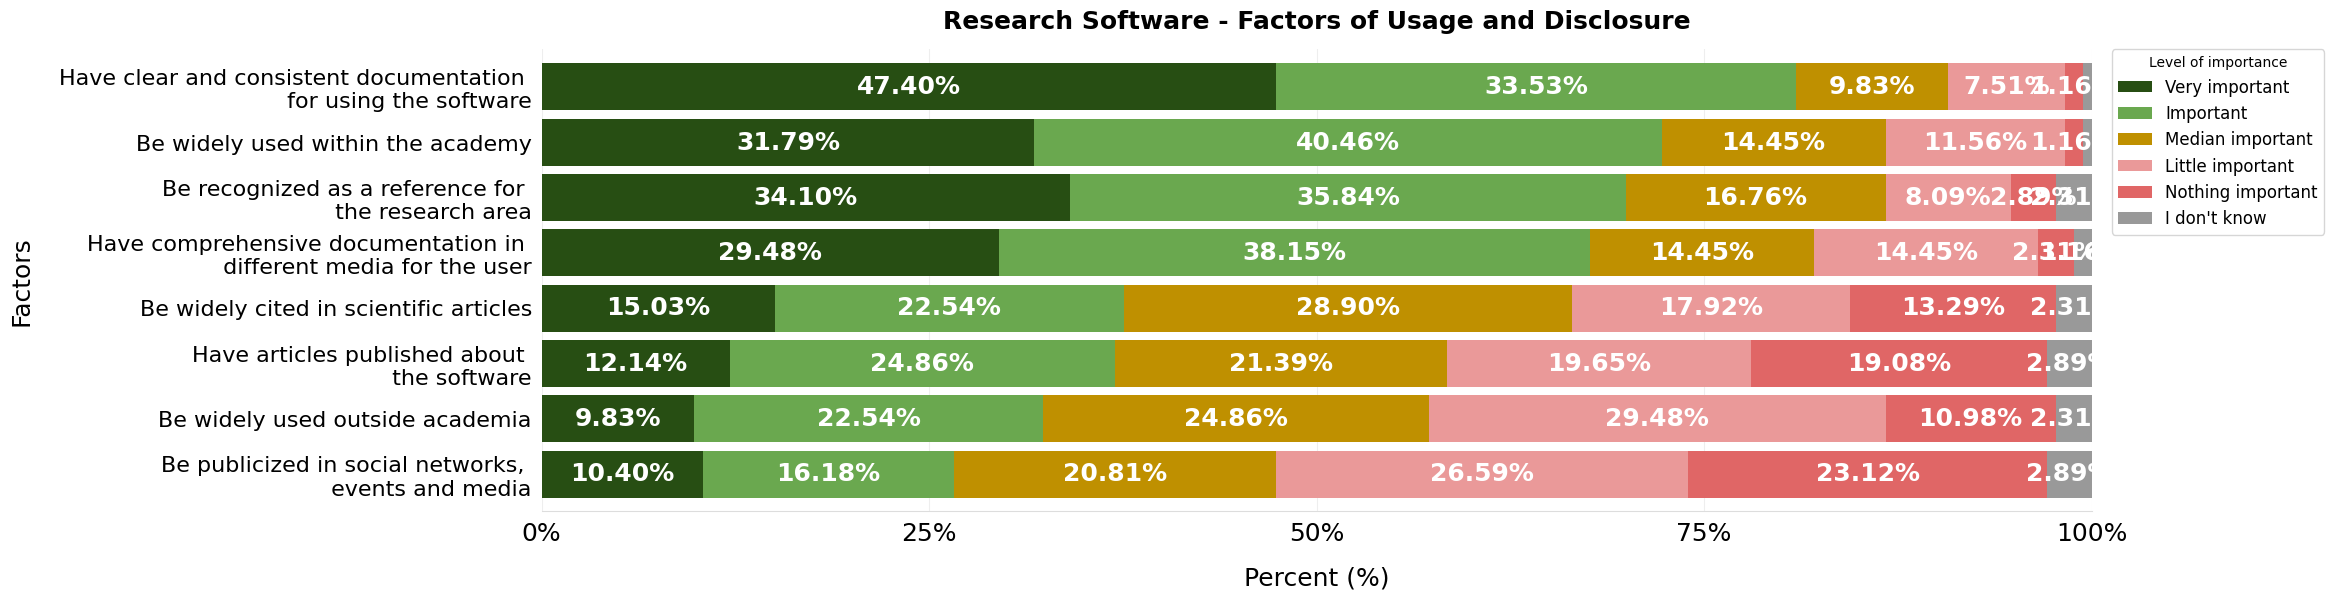

In [35]:
from pandas.io.common import is_fsspec_url
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Plot stacked horizontal bar chart
#df3_grafico.plot.barh(stacked=True, title="RS", xlabel ="Frequency", ylabel ="Factors" )
#plt.show()

#plotdata = df3_grafico
plotdata = df7
plotdata.head()


# Define a dictionary mapping variable values to colours:
colours = {"Very important": "#274E13", "Important": "#6AA84F", "Median important": "#BF9000", "Little important": "#EA9999", "Nothing important": "#E06666", "I don\'t know": "#999999"}

plt.rcParams["figure.figsize"] = (20, 6)
#plt.figure(figsize=(10,4))
#ax = plotdata.transpose().plot(kind="barh", stacked=True, color=colours).legend(loc='upper right', ncol=1, title="Level of importance", borderaxespad=0, bbox_to_anchor=(1.25, 1))

ax = plotdata.transpose().plot(kind="barh", stacked=True, color=colours, width=0.85, fontsize=16)



## Width of bars (everything above 1 will overlap)
FigBarsWidth=0.8
## FontSize of bar lables
FigBarsFontSize=18
# Data and Captions (needs to be defined)
## Unit to display within bars
FigBarUnit="%"

for rect in ax.patches:
    # Find where everything is located
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()

    # ax.text(x, y, text)
    label_x = x + width / 2
    label_y = y + height / 2

   # The width of the bar is the data value and can be used as the label
    label_text = ""
    # plot only when width is greater than specified value
    if width > 1:
      label_text = f'{width:.2f}' + FigBarUnit  ##### use {width:.2f} or {width:.3f} to increase precision  ####
      # plot only when height is greater than specified value
      if height > 0:
         ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=FigBarsFontSize, color='white', weight='bold')
    # plot only when width is greater than specified value <= 2
    #else:
     # if width >= 0:
     #   label_text = f'{width:.2f}' + FigBarUnit  ##### use {width:.2f} or {width:.3f} to increase precision  ####
     #  ax.text(label_x, label_y, label_text, ha='left', va='top', fontsize=FigBarsFontSize)
     # else:
     #   label_text = f'{width:.2f}' + FigBarUnit  ##### use {width:.2f} or {width:.3f} to increase precision  ####
     #   ax.text(label_x, label_y, label_text, ha='left', va='bottom', fontsize=FigBarsFontSize)


#comentado

    # The width of the bar is the data value and can be used as the label
#    label_text = ""
    # plot only when width is greater than specified value
#    if width > 2:
#      label_text = f'{width:.2f}' + FigBarUnit  ##### use {width:.2f} or {width:.3f} to increase precision  ####
      # plot only when height is greater than specified value
#      if height > 0:
#         ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=FigBarsFontSize)
    # plot only when width is greater than specified value <= 2
#   else:
#      if width >= 1:
#        label_text = f'{width:.2f}' + FigBarUnit  ##### use {width:.2f} or {width:.3f} to increase precision  ####
#        ax.text(label_x, label_y, label_text, ha='left', va='top', fontsize=FigBarsFontSize)
#      else:
#        label_text = f'{width:.2f}' + FigBarUnit  ##### use {width:.2f} or {width:.3f} to increase precision  ####
#        ax.text(label_x, label_y, label_text, ha='left', va='bottom', fontsize=FigBarsFontSize)


    # plot only when height is greater than specified value
#    if height > 0:
#        ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=FigBarsFontSize)




ax.legend(loc='upper right', ncol=1, title="Level of importance", borderaxespad=0, bbox_to_anchor=(1.15, 1), fontsize=12)

#for rowNum,row in ax.iterrows():
#    xpos = 0
#    for val in row:
#        xpos += val
#        ax.text(xpos + 1, rowNum-0.05, str(val), color='black')
#    xpos = 0

#for c in ax.containers:

    # customize the label to account for cases when there might not be a bar section
#    labels = [f'{v.get_width():.2f}%' if v.get_width() > 0 else '' for v in c ]
        # set the bar label
#    ax.bar_label(c, labels=labels, label_type='center', fontweight='bold')

# add labels
#plt.xlabel("Percent (%)", labelpad=14, fontsize=12)
#plt.ylabel("Factors", labelpad=14, fontsize=12)


#ax = ax.sort_values(by=['Very important', 'Important'], ascending=False)



# First, let's remove the top, right and left spines (figure borders)
# which really aren't necessary for a bar chart.
# Also, make the bottom spine gray instead of black.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')

# Second, remove the ticks as well.
ax.tick_params(bottom=False, left=False)

# Third, add a horizontal grid (but keep the vertical grid hidden).
# Color the lines a light gray as well.
ax.set_axisbelow(True)
ax.yaxis.grid(False)
ax.xaxis.grid(True, color='#EEEEEE')


ax.set_xlim(0, 100)
ticks = ax.set_xticks([0, 25, 50, 75, 100])
ax.set_xticklabels(("0%", "25%", "50%", "75%", "100%"), fontsize=18)

# add labels
ax.set_title("Research Software - Factors of Usage and Disclosure", pad=15, fontsize=18, weight='bold')
ax.set_ylabel("Factors", labelpad=18, fontsize=18)
ax.set_xlabel("Percent (%)", labelpad=15, fontsize=18)
#plt.show()

plt.gca().invert_yaxis()

print ('\n \033[1m Horizontal Bar Chart - Research Software - Factors of Usage and Disclosure - Ordered by Combined Very Important and Important Ratings \033[0m')


fig.savefig('my_figure.png')